In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import Normalizer

In [ ]:
import pandas as pd
import plotly.express as px
import datetime
import requests
import json

#### Description of dataset
###### Cement is in KG
###### Blast_Furnace_Slag	in KG
###### Fly_Ash	in KG
###### Water in KG
###### Superplasticizer	in KG
###### Coarse_Aggregate	in KG
###### Fine_Aggregate	in KG
###### Age in Days
###### Strength

In [ ]:
df = pd.read_csv("concrete_data-_1_.csv")
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.shape

(1030, 9)

### For how Many days

In [ ]:
df['Age'].value_counts()

,count
Age,
28,425
3,134
7,126
56,91
14,62
90,54
100,52
180,26
91,22


### Count of age

In [ ]:
df['Age'].nunique()

14

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.duplicated().sum()

np.int64(25)

## We can see 25 duplicate rows here

## which 25 rows are duplicates

In [ ]:
print(df[df.duplicated()].to_string())

     Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  Coarse_Aggregate  Fine_Aggregate  Age  Strength
77    425.0               106.3      0.0  153.5              16.5             852.1           887.1    3     33.40
80    425.0               106.3      0.0  153.5              16.5             852.1           887.1    3     33.40
86    362.6               189.0      0.0  164.9              11.6             944.7           755.8    3     35.30
88    362.6               189.0      0.0  164.9              11.6             944.7           755.8    3     35.30
91    362.6               189.0      0.0  164.9              11.6             944.7           755.8    3     35.30
100   425.0               106.3      0.0  153.5              16.5             852.1           887.1    7     49.20
103   425.0               106.3      0.0  153.5              16.5             852.1           887.1    7     49.20
109   362.6               189.0      0.0  164.9              11.6             94

In [ ]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
## No null and NAN values
df.isnull().sum()

,0
Cement,0
Blast_Furnace_Slag,0
Fly_Ash,0
Water,0
Superplasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0
Strength,0


In [ ]:
## copy data
data = df.copy()

### Remove duplicated rows before x_train and y_train split

In [ ]:
##Removing duplicate values
## using entire dataset(data) because the duplicated values should be removed from x_train and y_train

data = data.drop_duplicates()

In [ ]:
##Chech duplicate
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(1005, 9)

## Split data in x and y

In [ ]:
x = data.drop("Strength", axis=1)
x.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y = data["Strength"]
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [ ]:
x.ndim

2

In [ ]:
y.ndim

1

## Train Test split

In [ ]:

from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape

(804, 8)

In [ ]:
y_train.shape

(804,)

# EDA (Exploratory data analysis)

### Scatterplot

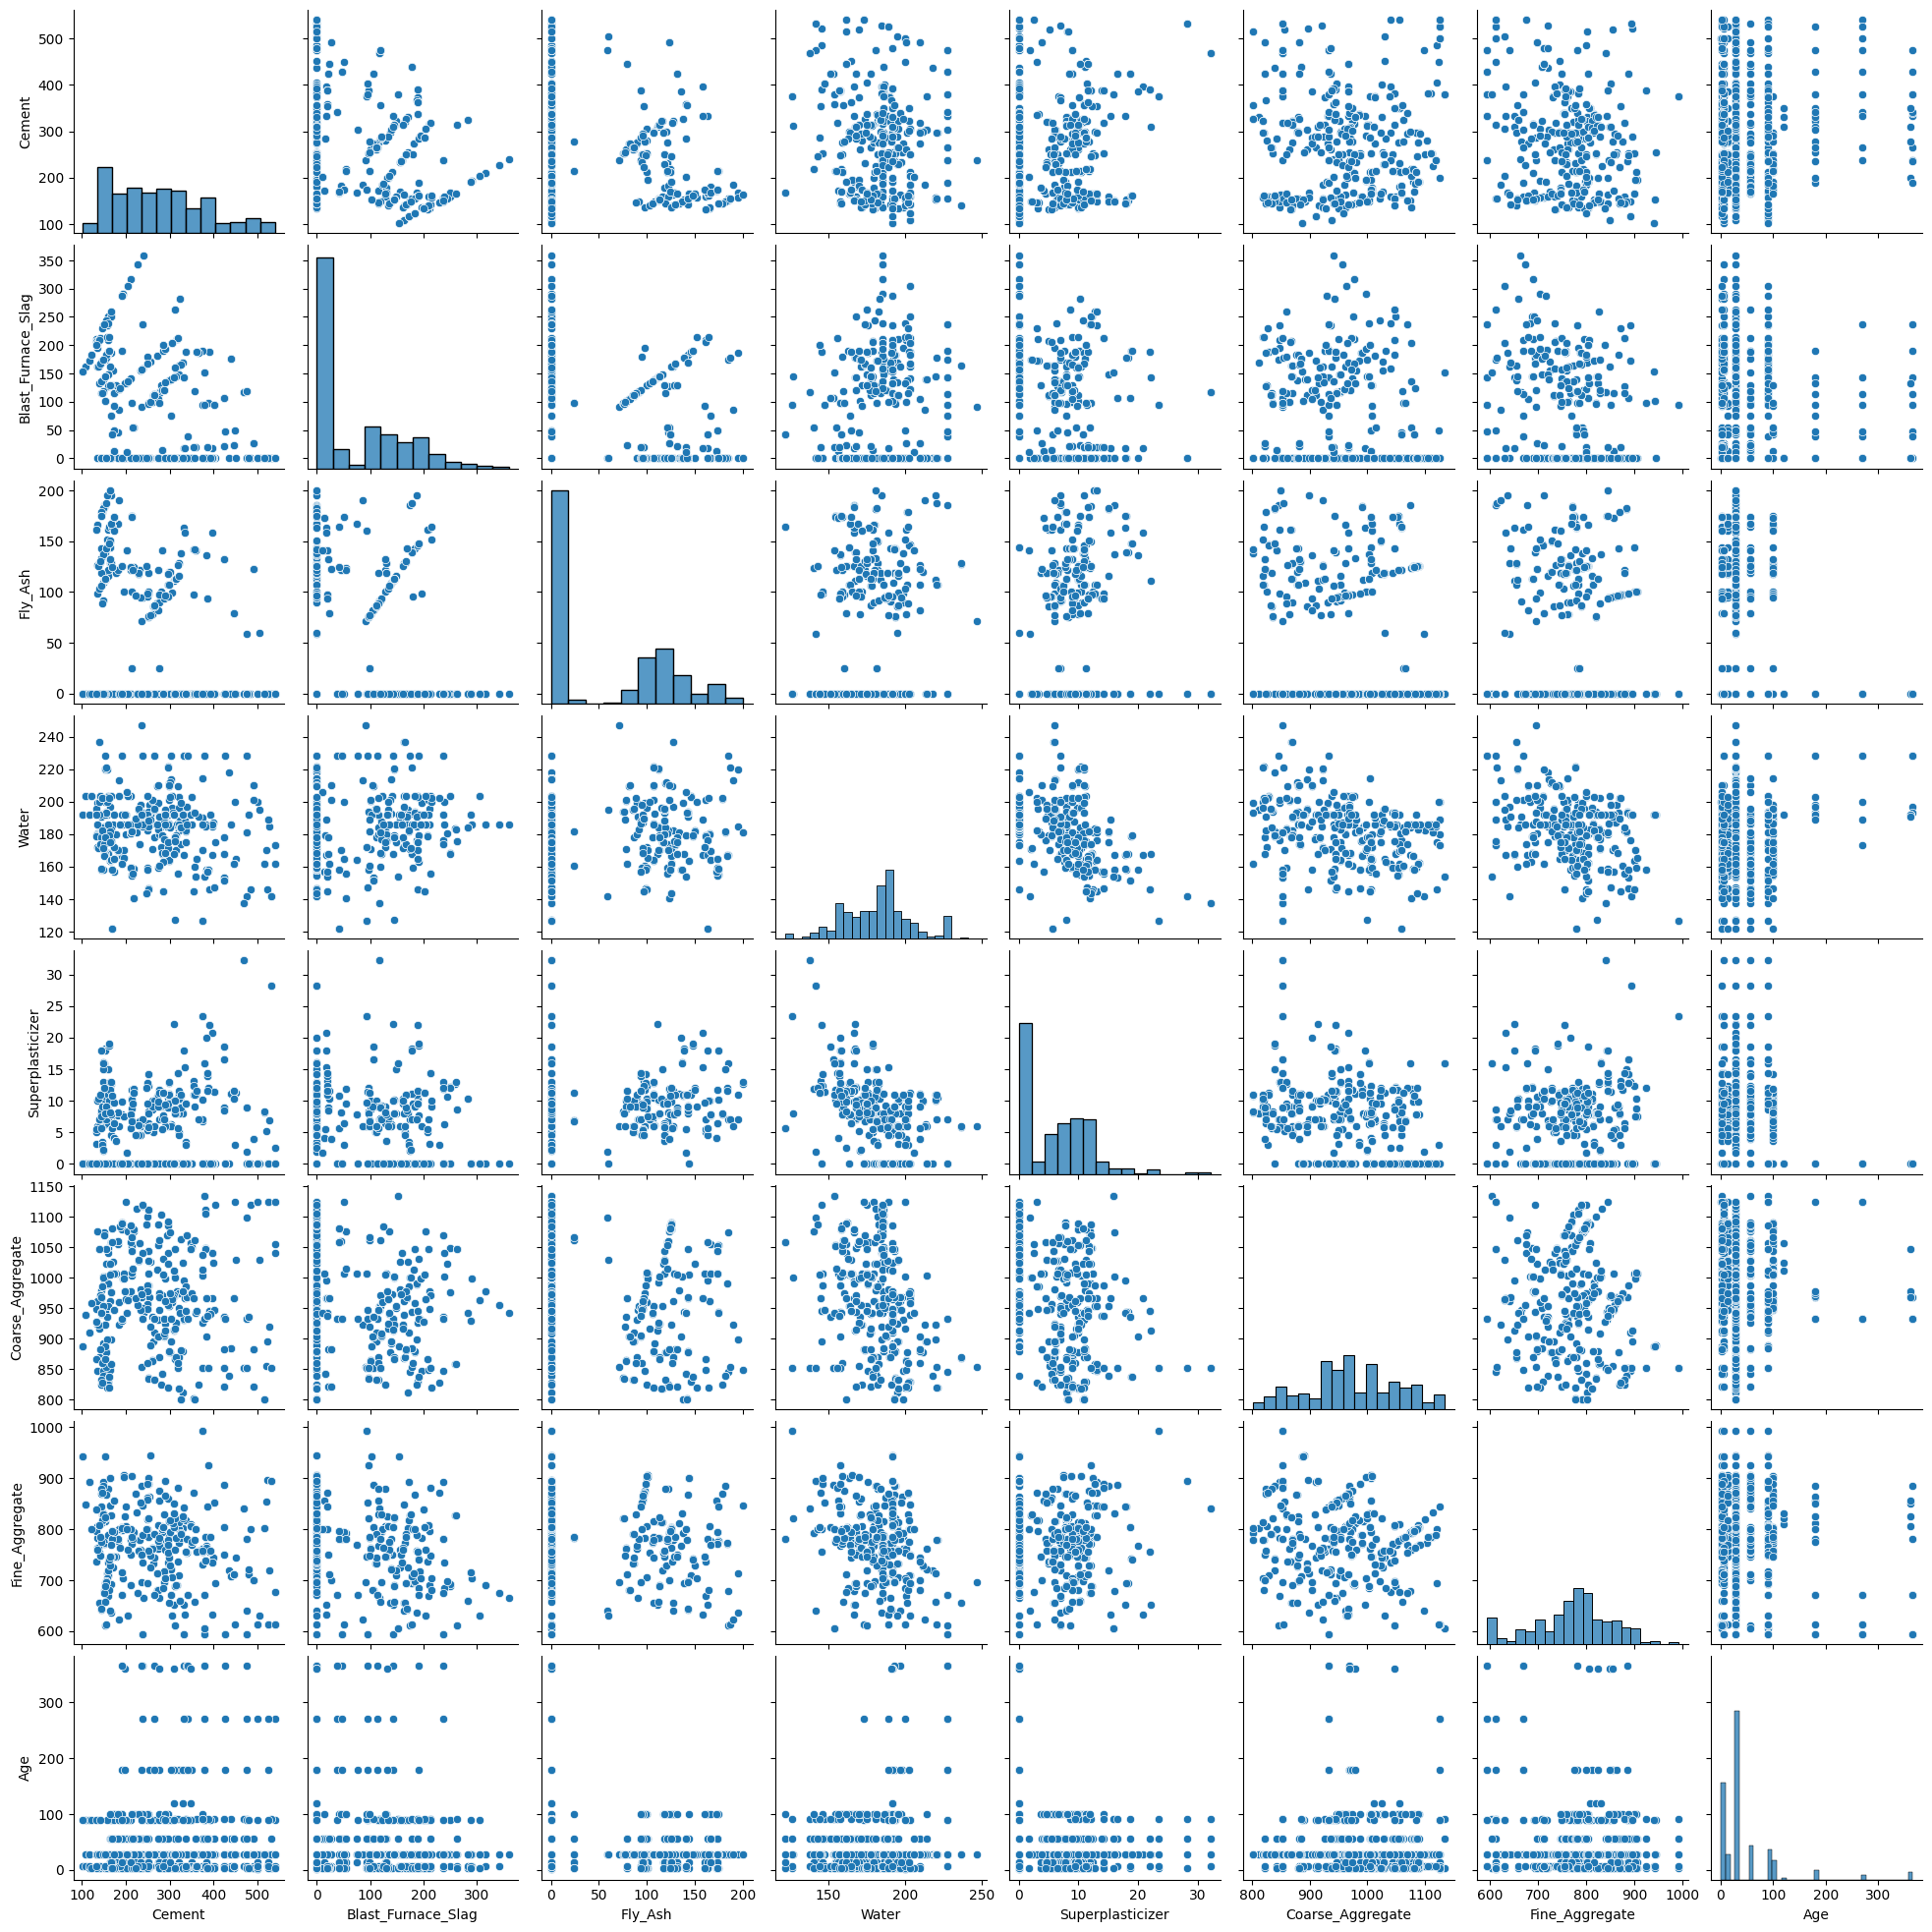

In [ ]:
sns.pairplot(X_train)

### Correlation plot

### For selecting features

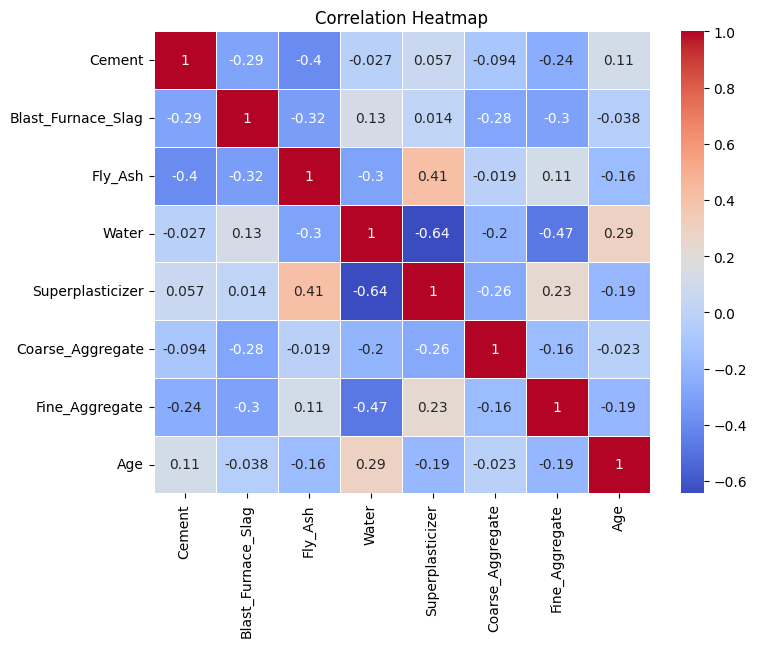

In [ ]:
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
features = data.corr()['Strength'].sort_values(ascending=False)
features

,Strength
Strength,1.000000
Cement,0.488283
Superplasticizer,0.344209
Age,0.337367
Blast_Furnace_Slag,0.103374
Fly_Ash,-0.080648
Coarse_Aggregate,-0.144717
Fine_Aggregate,-0.186448
Water,-0.269624


## Histogram

#### Helping to understand normally distributed columns and Scaling

array([[<Axes: title={'center': 'Cement'}>,
        <Axes: title={'center': 'Blast_Furnace_Slag'}>,
        <Axes: title={'center': 'Fly_Ash'}>],
       [<Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Superplasticizer'}>,
        <Axes: title={'center': 'Coarse_Aggregate'}>],
       [<Axes: title={'center': 'Fine_Aggregate'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

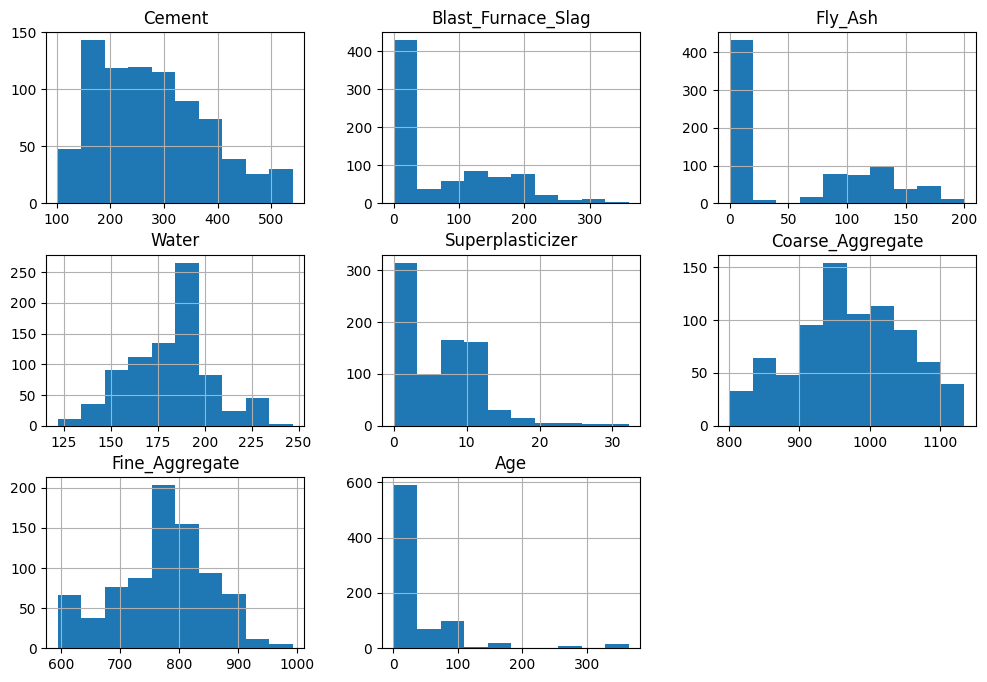

In [ ]:
X_train.hist(figsize=(12,8))

<Axes: >

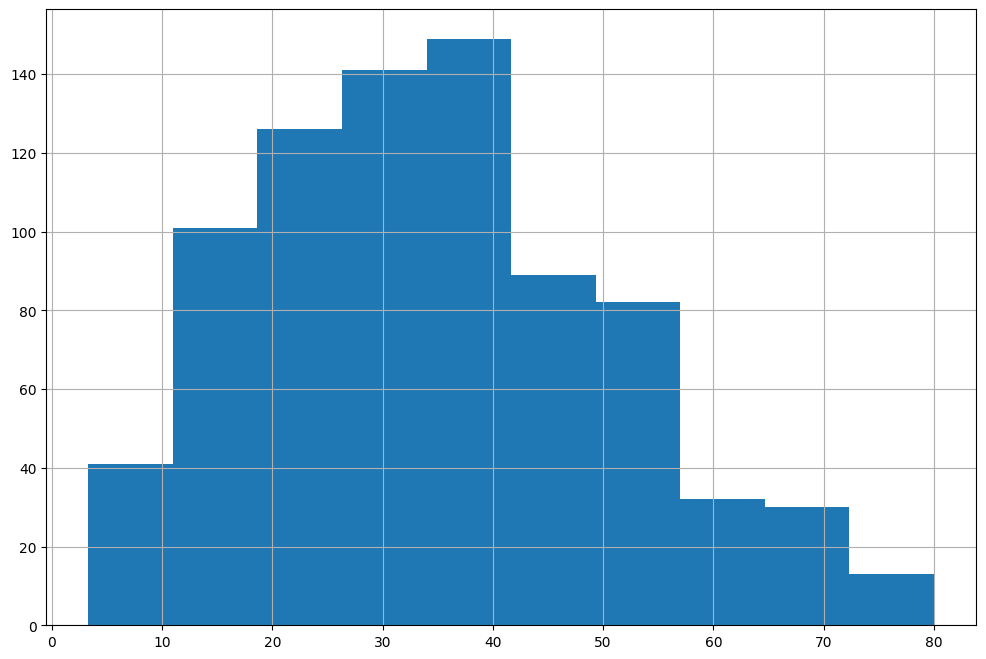

In [ ]:
y_train.hist(figsize=(12,8))

In [ ]:
### Density plot

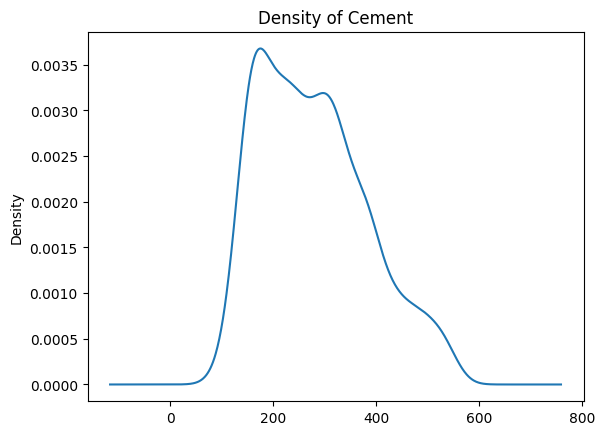

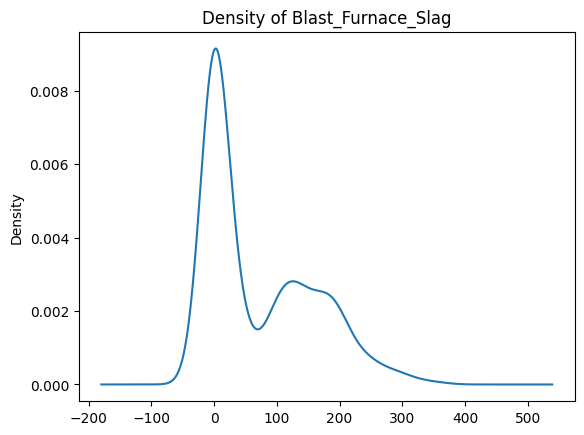

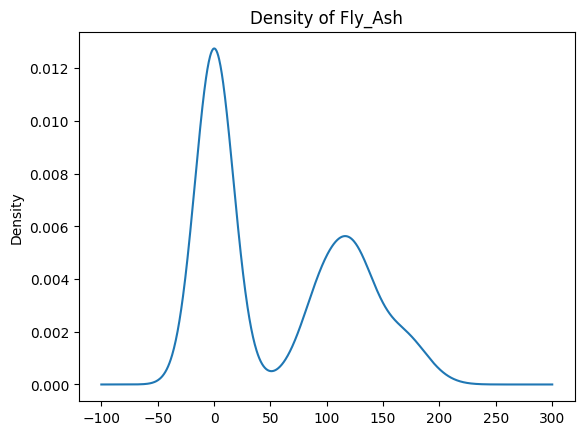

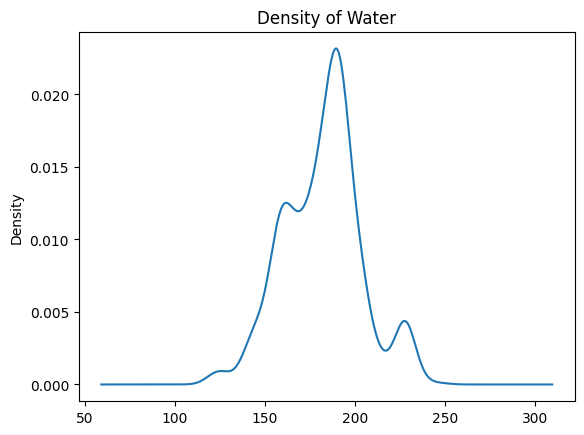

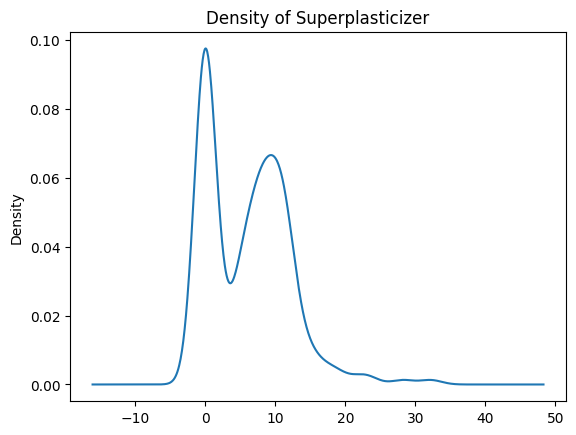

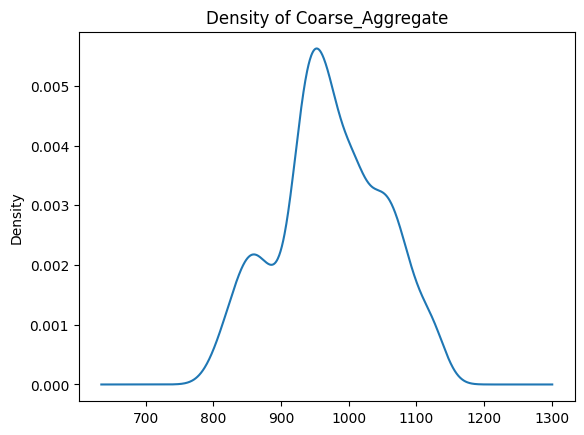

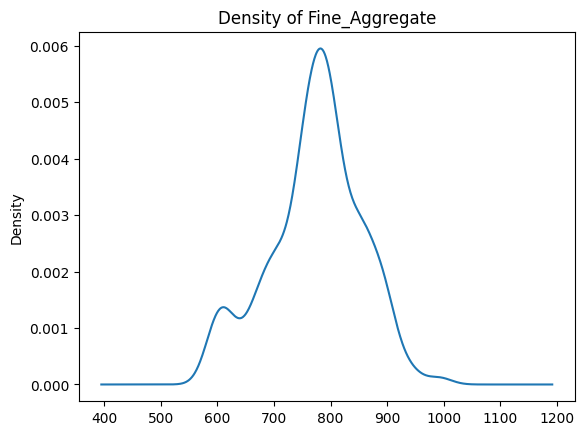

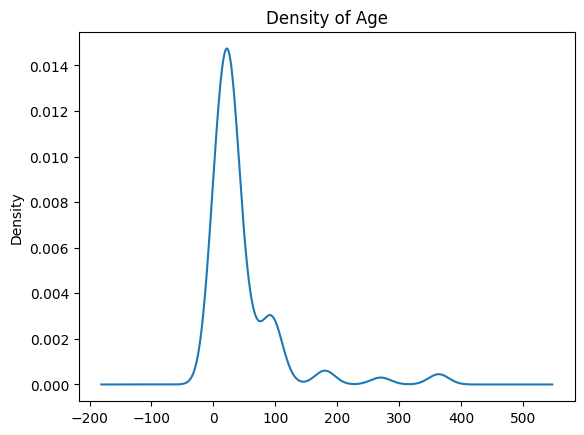

In [ ]:
for col in X_train.select_dtypes('number'):
    X_train[col].plot.kde(title=f'Density of {col}')
    plt.show()

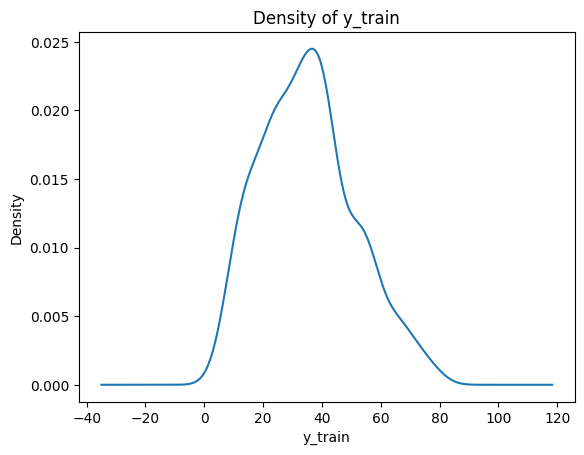

In [ ]:
y_train.plot.kde(title='Density of y_train')
plt.xlabel('y_train')
plt.ylabel('Density')
plt.show()

### Residual Plot
##### use it to check how good a regression model (linear regression).
#####  If Residuals randomly scattered around 0 line then Model captures pattern well and regression model is good.
##### If you see patterns, curves, or fan shapes, the model is not capturing the true relationship and needs improvement.

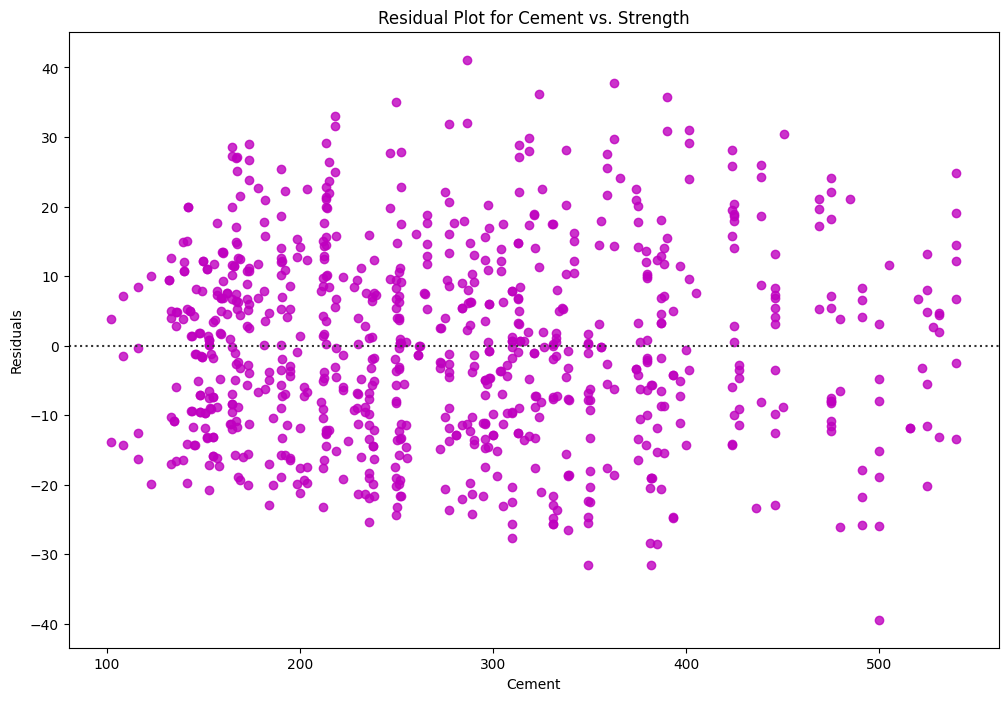

In [ ]:
plt.figure(figsize=(12,8))
sns.residplot(x=X_train['Cement'], y=y_train, color='m')
plt.title("Residual Plot for Cement vs. Strength")
plt.xlabel("Cement")
plt.ylabel("Residuals")
plt.show()


### pearson_coef, p_value
#### For selecting features

| Result                         | Meaning (Simple)                                    |
| ------------------------------ | --------------------------------------------------- |
| `pearson_coef` close to **+1** | Strong positive relationship
| `pearson_coef` close to **-1** | Strong negative relationship
| `pearson_coef` near **0**      | No clear relationship                               |
| `p_value` < 0.05               | Result is **statistically significant**
| `p_value` > 0.05               | Not significant (could be just by chance)


##### For P-value
p-value is < 0.001: Can say there is strong evidence that the correlation is significant.

p-value is < 0.05: there is moderate evidence that the correlation is significant.

p-value is < 0.1: there is weak evidence that the correlation is significant.

p-value is 0.1: there is no evidence that the correlation is significant.

In [ ]:
from scipy import stats

In [ ]:
X_train.shape

(804, 8)

In [ ]:
y_train.shape

(804,)

In [ ]:



pearson_coef, p_value = stats.pearsonr(X_train['Water'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)



The Pearson Correlation Coefficient is -0.2513057498456924 with a P-value of P = 4.793847224333119e-13


In [ ]:

pearson_coef, p_value = stats.pearsonr(X_train['Coarse_Aggregate'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.17272175502764087 with a P-value of P = 8.351783842753348e-07


In [ ]:

pearson_coef, p_value = stats.pearsonr(X_train['Fine_Aggregate'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.179029636669847 with a P-value of P = 3.224889847325141e-07


In [ ]:

pearson_coef, p_value = stats.pearsonr(X_train['Blast_Furnace_Slag'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.11082755974219477 with a P-value of P = 0.0016477749401607351


In [ ]:

pearson_coef, p_value = stats.pearsonr(X_train['Fly_Ash'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.08752579494419815 with a P-value of P = 0.013039474809158213


In [ ]:
pearson_coef, p_value = stats.pearsonr(X_train['Superplasticizer'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.35259426972286134 with a P-value of P = 6.007506490943128e-25


In [ ]:
pearson_coef, p_value = stats.pearsonr(X_train['Cement'], y_train)
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4968484745995357 with a P-value of P = 2.3954691805882868e-51


## Data Preprocessing and Data Cleaning

### Replace 0.0 values with np.nan

In [ ]:
X_train = X_train.replace(0.0, np.nan)

In [ ]:
X_train.isnull().sum()

,0
Cement,0
Blast_Furnace_Slag,372
Fly_Ash,431
Water,0
Superplasticizer,301
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0


### Nan values fill with mean()

In [ ]:
X_train['Blast_Furnace_Slag'] = X_train['Blast_Furnace_Slag'].fillna(X_train['Blast_Furnace_Slag'].mean())

X_train['Fly_Ash'] = X_train['Fly_Ash'].fillna(X_train['Fly_Ash'].mean())

X_train['Superplasticizer'] = X_train['Superplasticizer'].fillna(X_train['Superplasticizer'].mean())



In [ ]:
### check
X_train.isnull().sum()

,0
Cement,0
Blast_Furnace_Slag,0
Fly_Ash,0
Water,0
Superplasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0


### Make the columns normally distributed

#### The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered highly skewed data.
#### we can try to transform our data, so it looks more normally distributed.

## Log transformation

In [ ]:
mask = X_train.dtypes == np.float64
float64_cols = X_train.columns[mask]

float64_cols

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate'],
      dtype='object')

In [ ]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = X_train[float64_cols].skew()

skew_vals

,0
Cement,0.559110
Blast_Furnace_Slag,0.293445
Fly_Ash,-0.129961
Water,0.025153
Superplasticizer,2.337951
Coarse_Aggregate,-0.052696
Fine_Aggregate,-0.279615


In [ ]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit))) ## absolute value > skew_limit

skew_cols

,Skew
Superplasticizer,2.337951


### use long transformation

In [ ]:
X_train['Superplasticizer'] = np.log(X_train['Superplasticizer'])


In [ ]:
### Check skewness
print("Skewness: %f" % X_train['Superplasticizer'].skew())


Skewness: -0.764014


In [ ]:
### check for y_train
print("Skewness: %f" % y_train.skew())

### it looks better

Skewness: 0.390901


array([[<Axes: title={'center': 'Superplasticizer'}>]], dtype=object)

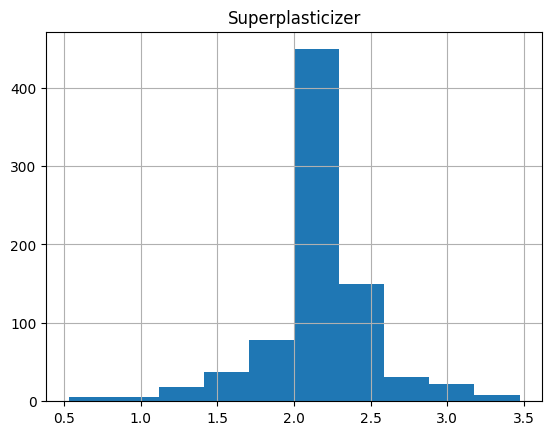

In [ ]:
## check histogram
X_train[['Superplasticizer']].hist()

## Standardscaler

In [ ]:




original_columns = X_train.columns   ## Because after scaling answer is in numpy array

#intance
scaler = StandardScaler()

#fit
X_train = scaler.fit_transform(X_train)

# conver numpy array into dataframe
X_train = pd.DataFrame(X_train, columns=original_columns)


In [ ]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.436728,0.000000,-6.557160e-16,-1.872881,3.101620,-1.560059,1.487304,-0.679041
1,1.894731,0.000000,-6.557160e-16,2.132243,0.172499,-0.525673,-2.218565,-0.614850
2,-0.010441,0.000000,-1.107839e+00,-0.999374,0.705283,0.016765,1.263493,-0.679041
3,1.519280,0.000000,-6.557160e-16,1.667611,0.172499,-1.737419,-0.664251,-0.277844
4,-1.072293,2.144443,-6.557160e-16,0.993895,0.172499,0.038774,-0.999350,-0.614850


## Model

#### **Linear Regression**

In [ ]:
X_train.shape

(804, 8)

In [ ]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.436728,0.000000,-6.557160e-16,-1.872881,3.101620,-1.560059,1.487304,-0.679041
1,1.894731,0.000000,-6.557160e-16,2.132243,0.172499,-0.525673,-2.218565,-0.614850
2,-0.010441,0.000000,-1.107839e+00,-0.999374,0.705283,0.016765,1.263493,-0.679041
3,1.519280,0.000000,-6.557160e-16,1.667611,0.172499,-1.737419,-0.664251,-0.277844
4,-1.072293,2.144443,-6.557160e-16,0.993895,0.172499,0.038774,-0.999350,-0.614850


In [ ]:
y_train.shape

(804,)

In [ ]:
X_train = X_train[['Cement', 'Coarse_Aggregate', 'Age', 'Superplasticizer', 'Blast_Furnace_Slag', 'Fine_Aggregate', 'Fly_Ash', 'Water']]



In [ ]:
## library

from sklearn.linear_model import LinearRegression

## Instance

lre=LinearRegression()

In [ ]:
### fit data

lre.fit(X_train, y_train)

LinearRegression()

In [ ]:
## prediction on train set

ypred = lre.predict(X_train)

#### Evaluation
Mean square error(MSE) MSE = (1/n) * Σ(yi - ŷi)^2

Absolute Mean Squared Error (AMSE): AMSE = (1/n) * Σ|yi - ŷi|

Root Mean Squared Error (RMSE): RMSE = √((1/n) * Σ(yi - ŷi)^2)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 105.06
Root Mean Squared Error (RMSE): 10.25
Mean Absolute Error (MAE): 8.20
R-squared (R²) Score: 0.59


In [ ]:
lre.intercept_

np.float64(35.066977611940295)

In [ ]:
lre.coef_

array([  5.20478416,  -5.42355971,   6.8991339 ,  -1.65280736,
         1.25864898,  -6.02030913,  -1.85059863, -10.65218698])

In [ ]:
## using cross validation

Lr_cv = -cross_val_score(lre, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
Lr_cv

array([131.57158561, 102.06426031, 134.91210635,  93.0259961 ,
        91.12037891,  99.85671162,  98.444238  ,  84.43323972,
       142.37727099, 109.41267706])

In [ ]:
mean_cv = Lr_cv.mean()
mean_cv

np.float64(108.7218464666073)

<ipython-input-201-6c810e2b02e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-201-6c810e2b02e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred, hist=False, color="b", label="fitted value", 

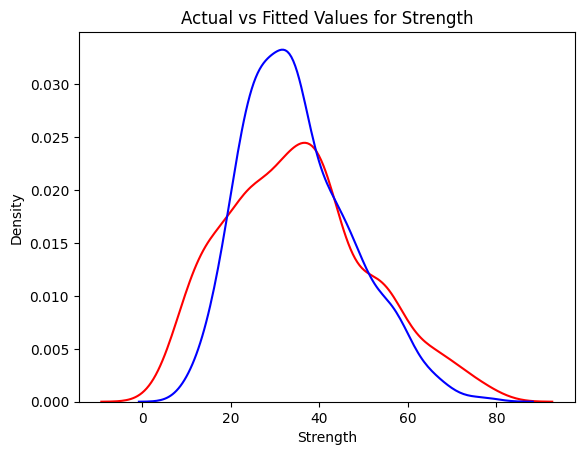

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

#### **Polynomial Regression**
##### Degree = 2

In [ ]:
## library

from sklearn.preprocessing import PolynomialFeatures

## instance

poly_feature = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
## transform data

x_poly_train = poly_feature.fit_transform(X_train)

In [ ]:
x_poly_train.shape

(804, 44)

In [ ]:
### fit liner model on non linear data

lin_reg = LinearRegression()

## fit

lin_reg.fit(x_poly_train, y_train)

LinearRegression()

In [ ]:
lin_reg.intercept_

np.float64(40.113986237156944)

In [ ]:
lin_reg.coef_

array([  5.35194381,  -5.7769396 ,  18.1226984 ,  -2.74166692,
        -0.16733801,  -6.73317983,  -1.8693107 , -11.13928485,
        -0.20051571,   0.27683306,  -1.88750183,  -1.36008204,
        -1.02829351,  -1.5907113 ,   1.00087552,  -2.43000637,
        -0.07573769,  -1.32217409,  -0.60412429,  -2.07266716,
        -0.44843797,   0.31387068,  -0.93594204,  -2.57937758,
        -0.07234904,  -0.19932159,  -1.65139743,  -0.48374669,
        -2.97232833,  -0.72216627,  -1.90133259,  -0.99111724,
        -0.83271365,  -1.9317785 ,  -0.09329303,  -2.40664835,
        -2.52929939,  -3.26846736,  -2.40305895,   0.15694729,
        -1.94725986,   0.33250743,   0.40892058,   0.07556444])

In [ ]:
## Prediction

ypred_poly = lin_reg.predict(x_poly_train)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred_poly))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred_poly)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 55.20
Root Mean Squared Error (RMSE): 7.43
Mean Absolute Error (MAE): 5.80
R-squared (R²) Score: 0.78


In [ ]:
## cross validation
Rcross_poly = cross_val_score(lin_reg, x_poly_train, y_train, cv=10)
Rcross_poly

array([0.68437265, 0.81209242, 0.6949026 , 0.76455032, 0.77137892,
       0.74847953, 0.76644347, 0.72118532, 0.77763976, 0.68031052])

In [ ]:
# Calculate the mean of the cross-validation scores
mean_score = np.mean(Rcross_poly)

# Print the mean score
print("Mean Cross-Validation Score(RcrossMean):", mean_score)

Mean Cross-Validation Score(RcrossMean): 0.7421355510556386


<ipython-input-212-8db263e1d564>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-212-8db263e1d564>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_poly, hist=False, color="b", label="fitted val

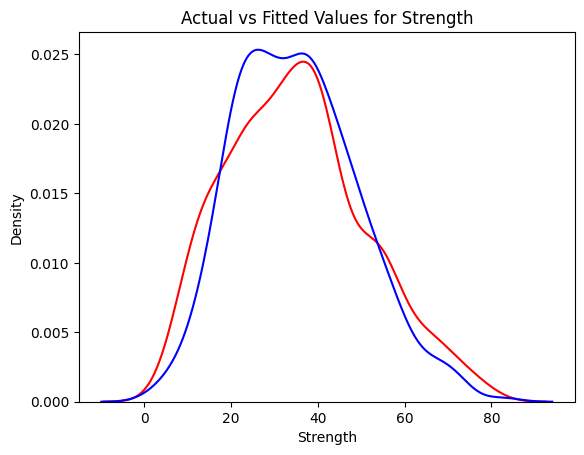

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred_poly, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

#### **Ridge regression**

In [ ]:
# import library RidgeRegression()
from sklearn.linear_model import Ridge

# instance
ridge_model =  Ridge(random_state=42)

In [ ]:
## fit

ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [ ]:
ridge_model.intercept_

np.float64(35.066977611940295)

In [ ]:
ridge_model.coef_

array([  5.20536212,  -5.40386958,   6.88328491,  -1.63872436,
         1.25136604,  -5.9958936 ,  -1.84428414, -10.61300046])

In [ ]:
## Prediction

ypred_ridge = ridge_model.predict(X_train)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred_ridge)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred_ridge))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred_ridge)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 105.06
Root Mean Squared Error (RMSE): 10.25
Mean Absolute Error (MAE): 8.20
R-squared (R²) Score: 0.59


<ipython-input-219-59312644d98d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-219-59312644d98d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_ridge, hist=False, color="b", label="fitted va

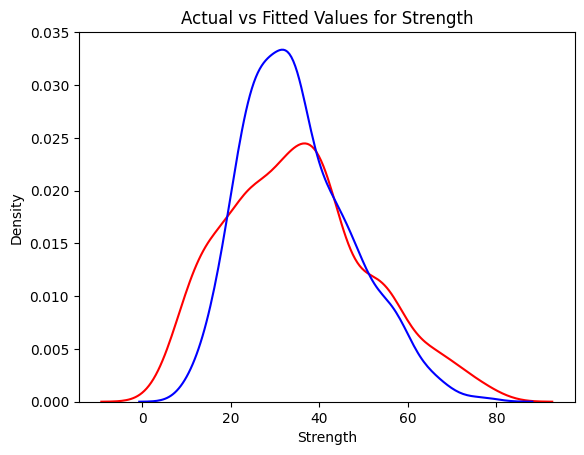

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred_ridge, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

### Pipeline with Polynomial and ridge

In [ ]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2) ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=1))])

In [ ]:
intercept = pipe.named_steps['model'].intercept_
intercept



np.float64(40.041241340656256)

In [ ]:
coefficients = pipe.named_steps['model'].coef_
coefficients

array([  5.35508187,  -5.72896944,  17.99321747,  -2.70142743,
        -0.12809426,  -6.67734536,  -1.851276  , -11.05885487,
        -0.18067263,   0.28291427,  -1.87689869,  -1.35927144,
        -0.95038164,  -1.55288843,   1.00246127,  -2.4058549 ,
        -0.07319876,  -1.25718865,  -0.60451149,  -2.01062002,
        -0.43876922,   0.31672607,  -0.94144736,  -2.5699542 ,
        -0.02803829,  -0.20417003,  -1.61338102,  -0.46393132,
        -2.89486606,  -0.71047357,  -1.89031034,  -0.98836728,
        -0.82909735,  -1.92518888,  -0.0665153 ,  -2.32689123,
        -2.48314545,  -3.20207511,  -2.37817356,   0.15603739,
        -1.94009277,   0.33116719,   0.40818463,   0.07212586])

In [ ]:
ypred_ridge_poly = pipe.predict(X_train)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred_ridge_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred_ridge_poly))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred_ridge_poly)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 55.20
Root Mean Squared Error (RMSE): 7.43
Mean Absolute Error (MAE): 5.80
R-squared (R²) Score: 0.78


<ipython-input-226-197577088946>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-226-197577088946>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_ridge_poly, hist=False, color="b", label="fitt

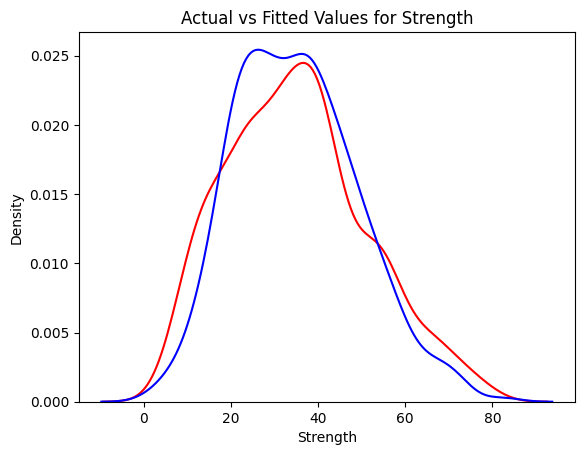

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred_ridge_poly, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

## Lasso regression (Least Absolute Shrinkage and Selection Operator)

##### In this section, let's review the Lasso (Least Absolute Shrinkage and Selection Operator) Regression. Lasso Regression makes the prior assumption that our coefficients have Laplace (double-exponential) distribution around zero. The scale parameter of the distribution is inversely proportional to the parameter alpha. The main advantage of LASSO Regression is that many coefficients are set to zero, therefore they are not required. This has many advantages, one of them is that you may not need to collect and/or store all of the features. This may save resource.minimize the MSE, but we also penalize large weights by including their sum of absolute values.

In [ ]:
# instance
lasso = Lasso(alpha=0.1)

#fit
lasso.fit(X_train,y_train)
lasso

Lasso(alpha=0.1)

In [ ]:
lasso.intercept_

np.float64(35.066977611940295)

In [ ]:
lasso.coef_

array([  5.14285587,  -5.17663904,   6.70962394,  -1.38828095,
         1.06006026,  -5.76527358,  -1.72255941, -10.20465247])

In [ ]:
## Prediction

ypred_lasso = lasso.predict(X_train)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred_lasso)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred_lasso))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred_lasso)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 105.24
Root Mean Squared Error (RMSE): 10.26
Mean Absolute Error (MAE): 8.24
R-squared (R²) Score: 0.59


<ipython-input-232-a53a62ab3bbb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-232-a53a62ab3bbb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_lasso, hist=False, color="b", label="fitted va

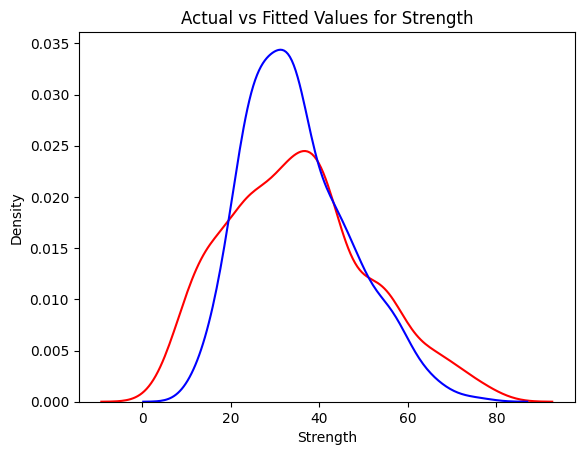

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred_lasso, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

### Pipeline with lasso and polynomial

In [ ]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2) ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe_lasso = Pipeline(Input)

In [ ]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=1, tol=0.2))])

In [ ]:
intercept = pipe_lasso.named_steps['model'].intercept_
intercept


np.float64(35.72822742855493)

In [ ]:
coefficients = pipe_lasso.named_steps['model'].coef_
coefficients

array([ 5.61198566, -2.24531353,  8.21413394, -0.        ,  0.        ,
       -2.50432354, -0.21130765, -5.6417958 ,  0.        , -0.        ,
       -0.14473422, -0.        ,  0.        ,  0.        ,  0.0087296 ,
       -0.48502964,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -1.21350223,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.31625183,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.24130681])

In [ ]:
ypred_lasso_poly = pipe_lasso.predict(X_train)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, ypred_lasso_poly)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - ypred_lasso_poly))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, ypred_lasso_poly)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 101.42
Root Mean Squared Error (RMSE): 10.07
Mean Absolute Error (MAE): 8.17
R-squared (R²) Score: 0.60


<ipython-input-239-d809cdaaff8b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-239-d809cdaaff8b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_lasso_poly, hist=False, color="b", label="fitt

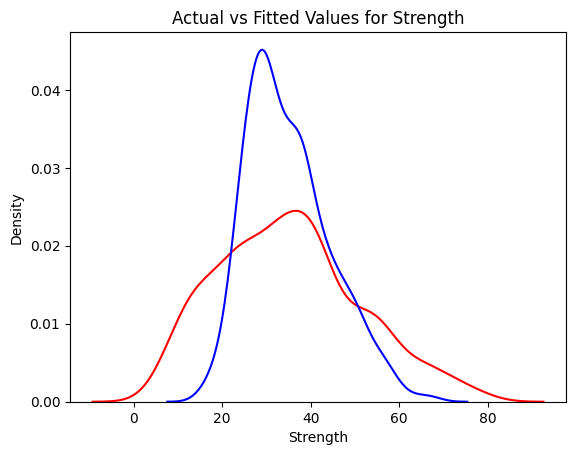

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(ypred_lasso_poly, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

### Table for comparing all models

In [ ]:

import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML

# Define the evaluation metrics for each model
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Ridge Regression', 'Polynomial Lasso Regression']
r_squared_scores = [0.59, 0.78, 0.78, 0.60]
mse_values = [105.06, 55.20, 55.20, 101.42]

# Create a DataFrame
dataset = {
    'Model': models,
    'R-Squared Score': r_squared_scores,
    'MSE': mse_values
}

DataFrame = pd.DataFrame(dataset)

# Display the DataFrame with bold headings and in tabular format
html = DataFrame.to_html(classes='table table-bordered table-striped', index=False)

display(HTML(html))

Model,R-Squared Score,MSE
Linear Regression,0.59,105.06
Polynomial Regression,0.78,55.20
Polynomial Ridge Regression,0.78,55.20
Polynomial Lasso Regression,0.60,101.42


### Choosing polynomial Ridge regression

### Fine tune - use hyperparameter for polynomial regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# pipeline steps for polynomial Ridge regression
Input = [
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('ridge', Ridge(alpha=1))
]
pipe = Pipeline(Input)

# Define the parameter grid with step names matching the pipeline steps
param_grid = {
    'polynomial__degree': [1, 2, 3, 4],  # note 'polynomial' not 'poly'
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Instantiate GridSearchCV with pipeline and parameters
grid_search_cv_polyRidge = GridSearchCV(pipe, param_grid, verbose=1, cv=10)

# Fit the grid search model and print the best parameters
grid_search_cv_polyRidge .fit(X_train, y_train)
print("The best parameters are: ", grid_search_cv_polyRidge .best_params_)

# Save the best model from the grid search
poly_model = grid_search_cv_polyRidge.best_estimator_


Fitting 10 folds for each of 16 candidates, totalling 160 fits
The best parameters are:  {'polynomial__degree': 3, 'ridge__alpha': 10}


In [ ]:
score = poly_model.score(X_train, y_train)
score

0.8914381194560561

In [ ]:
y_pred_best = poly_model.predict(X_train)  # Predictions


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_best)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_train - y_pred_best))

# Calculate R-squared (R2) score
r2 = r2_score(y_train, y_pred_best)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 27.84
Root Mean Squared Error (RMSE): 5.28
Mean Absolute Error (MAE): 4.03
R-squared (R²) Score: 0.89


<ipython-input-245-e39399960e16>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")
<ipython-input-245-e39399960e16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_best, hist=False, color="b", label="fitted va

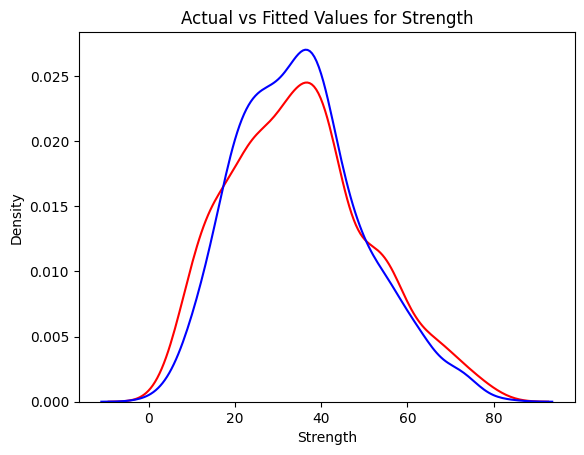

In [ ]:
ax1 = sns.distplot(y_train, hist=False, color='red', label="Actual value")

sns.distplot(y_pred_best, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

#Evaluation Test set

### Use all Preprocessing steps on test data and after that predict

### Replace 0.0 values with np.nan

In [ ]:
X_test = X_test.replace(0.0, np.nan)

In [ ]:
X_test.isnull().sum()

,0
Cement,0
Blast_Furnace_Slag,98
Fly_Ash,110
Water,0
Superplasticizer,77
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0


Nan values fill with mean()

In [ ]:
X_test['Blast_Furnace_Slag'] = X_test['Blast_Furnace_Slag'].fillna(X_test['Blast_Furnace_Slag'].mean())

X_test['Fly_Ash'] = X_test['Fly_Ash'].fillna(X_test['Fly_Ash'].mean())

X_test['Superplasticizer'] = X_test['Superplasticizer'].fillna(X_test['Superplasticizer'].mean())

In [ ]:
X_test.isnull().sum()

,0
Cement,0
Blast_Furnace_Slag,0
Fly_Ash,0
Water,0
Superplasticizer,0
Coarse_Aggregate,0
Fine_Aggregate,0
Age,0


##log transformation


In [ ]:
mask = X_test.dtypes == np.float64
float64_cols = X_test.columns[mask]

float64_cols

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate'],
      dtype='object')

In [ ]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = X_test[float64_cols].skew()

skew_vals

,0
Cement,0.589440
Blast_Furnace_Slag,0.246611
Fly_Ash,-0.419222
Water,0.075637
Superplasticizer,2.649882
Coarse_Aggregate,-0.123356
Fine_Aggregate,-0.140620


In [ ]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit))) ## absolute value > skew_limit

skew_cols

,Skew
Superplasticizer,2.649882


#### using log transform on x_test

In [ ]:
X_test['Superplasticizer'] = np.log(X_test['Superplasticizer'])

In [ ]:
### Check skewness
print("Skewness: %f" % X_test['Superplasticizer'].skew())

Skewness: -0.599378


In [ ]:
### check for y_train
print("Skewness: %f" % y_test.skew())

### it looks better

Skewness: 0.394625


### Standscaler on x_test

In [ ]:



original_columns = X_test.columns   ## Because after scaling answer is in numpy array

#intance
scaler = StandardScaler()

#fit
X_test = scaler.fit_transform(X_test)

# conver numpy array into dataframe
X_test = pd.DataFrame(X_test, columns=original_columns)

In [ ]:
### arrange same feature as x_train

X_test = X_test[['Cement', 'Coarse_Aggregate', 'Age', 'Superplasticizer', 'Blast_Furnace_Slag', 'Fine_Aggregate', 'Fly_Ash', 'Water']]

In [ ]:
X_test.head()

,Cement,Coarse_Aggregate,Age,Superplasticizer,Blast_Furnace_Slag,Fine_Aggregate,Fly_Ash,Water
0,-1.205733,0.232841,-0.290545,-0.309828,8.519568e-02,0.673068,5.290184e-16,-0.187036
1,-1.489894,-0.297045,-0.290545,0.169946,8.604630e-01,0.389389,5.290184e-16,1.049874
2,-1.202901,-1.193381,0.608803,0.169946,-7.592919e-01,2.224958,5.290184e-16,0.489856
3,1.884161,-0.577948,-0.595164,0.169946,5.621026e-16,-0.738909,5.290184e-16,0.489856
4,2.073917,1.825051,-0.290545,-3.114762,5.621026e-16,-2.009688,5.290184e-16,0.879434


### Prediction on x_test using best model

In [ ]:
y_pred_best_test = poly_model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_best_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred_best_test))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_best_test)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 76.59
Root Mean Squared Error (RMSE): 8.75
Mean Absolute Error (MAE): 5.98
R-squared (R²) Score: 0.74


<ipython-input-261-64b07c5921fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='red', label="Actual value")
<ipython-input-261-64b07c5921fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_best_test, hist=False, color="b", label="fitte

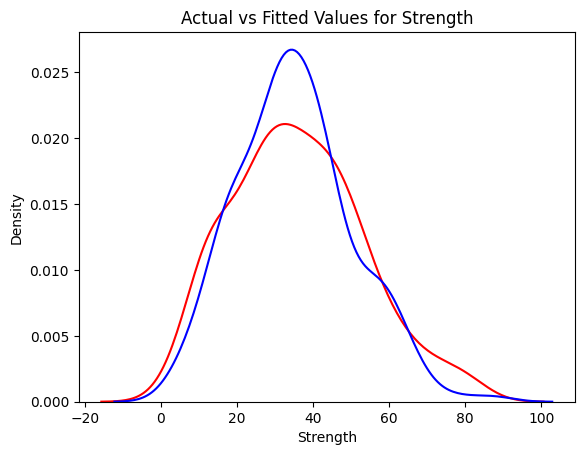

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color='red', label="Actual value")

sns.distplot(y_pred_best_test, hist=False, color="b", label="fitted value", ax=ax1)

plt.title('Actual vs Fitted Values for Strength')

plt.show()

## X_train is the cleaned dataset for answer the question

In [ ]:
X_train.head()

,Cement,Coarse_Aggregate,Age,Superplasticizer,Blast_Furnace_Slag,Fine_Aggregate,Fly_Ash,Water
0,2.436728,-1.560059,-0.679041,3.101620,0.000000,1.487304,-6.557160e-16,-1.872881
1,1.894731,-0.525673,-0.614850,0.172499,0.000000,-2.218565,-6.557160e-16,2.132243
2,-0.010441,0.016765,-0.679041,0.705283,0.000000,1.263493,-1.107839e+00,-0.999374
3,1.519280,-1.737419,-0.277844,0.172499,0.000000,-0.664251,-6.557160e-16,1.667611
4,-1.072293,0.038774,-0.614850,0.172499,2.144443,-0.999350,-6.557160e-16,0.993895


# Original column

In [ ]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data['Age'].value_counts()

,count
Age,
28,419
3,129
7,122
56,86
14,62
90,54
100,52
180,26
91,17


## what is the best strength on average?

## Best strength by age on average

In [ ]:

# Group data by Age and calculate average Strength for each
avg_strength_by_age = data.groupby('Age')['Strength'].mean()

avg_strength_by_age


,Strength
Age,
1,9.455000
3,18.378140
7,25.182049
14,28.750968
28,36.429570
56,50.715233
90,40.480370
91,68.675882
100,47.668846


In [ ]:
# Sort to find the best age (highest average strength)
best_age = avg_strength_by_age.idxmax()
best_strength = avg_strength_by_age.max()

# Show results
print(f"The best strength on average is at Age {best_age} days with strength {best_strength:.2f}")


### records for 91 days are very less

The best strength on average is at Age 91 days with strength 68.68


# visualization - Dashboard

### Data for 28 days of strength

In [ ]:
data_28 = data[data['Age'] == 28]
data_28.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


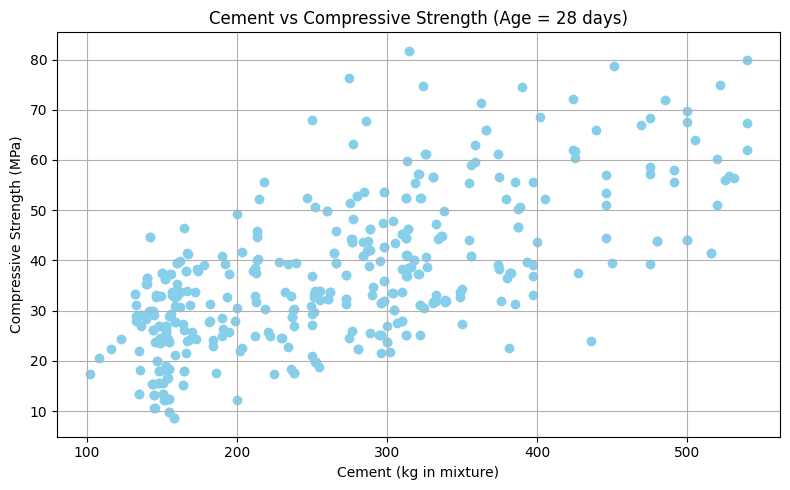

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data_28['Cement'], data_28['Strength'], color='skyblue')
plt.title('Cement vs Compressive Strength (Age = 28 days)')
plt.xlabel('Cement (kg in mixture)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.tight_layout()
plt.show()

### scatter plot shows positive correlation

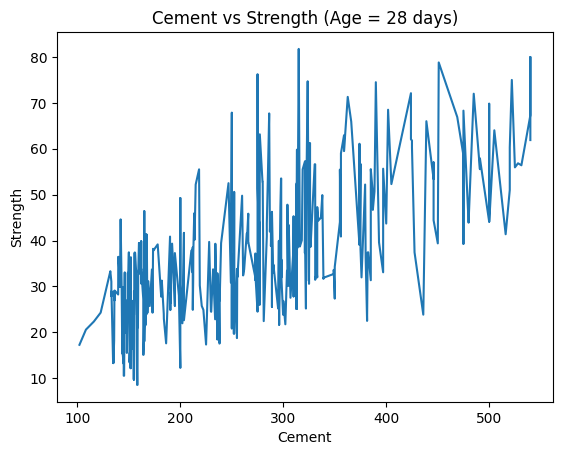

In [ ]:

df_28 = data_28.sort_values('Cement')

plt.plot(df_28['Cement'], df_28['Strength'])
plt.title('Cement vs Strength (Age = 28 days)')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()


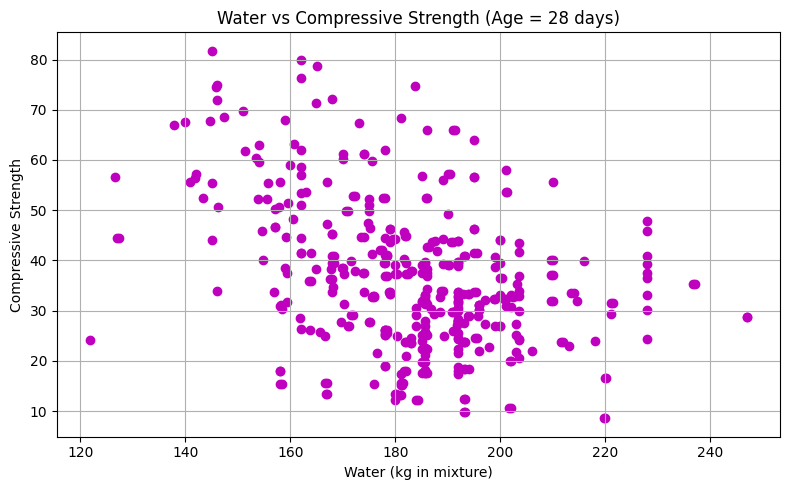

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data_28['Water'], data_28['Strength'], color='m')
plt.title('Water vs Compressive Strength (Age = 28 days)')
plt.xlabel('Water (kg in mixture)')
plt.ylabel('Compressive Strength')
plt.grid(True)
plt.tight_layout()
plt.show()

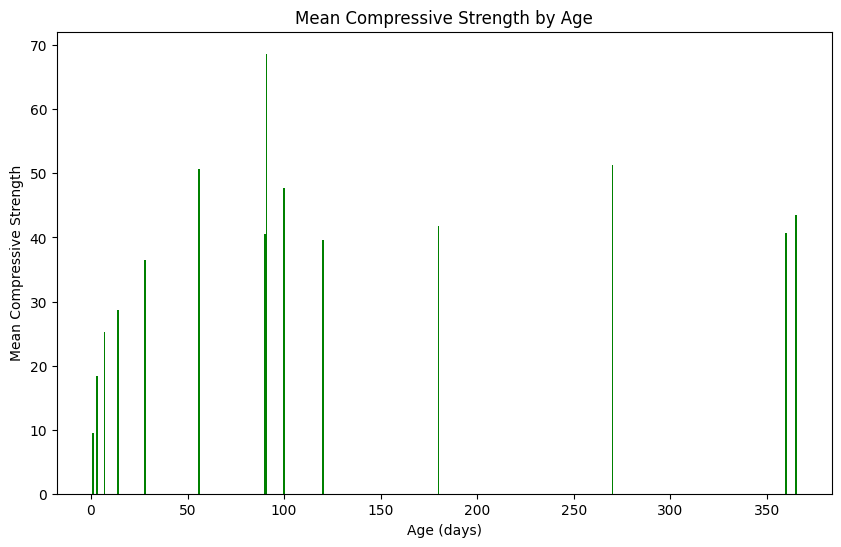

In [ ]:
# Calculate mean compressive strength for each Age
mean_strength_age = data.groupby('Age')['Strength'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))

plt.bar(mean_strength_age['Age'], mean_strength_age['Strength'], color='green')
plt.xlabel('Age (days)')
plt.ylabel('Mean Compressive Strength')
plt.title('Mean Compressive Strength by Age')
plt.show()

